In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.externals import joblib
import sklearn.linear_model as lm

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
df=pd.read_csv("fuelConsumption.csv")
df.describe()


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


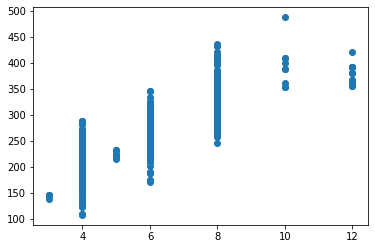

In [3]:
plt.scatter(df.CYLINDERS,df.CO2EMISSIONS)


In [5]:
value=np.random.rand(len(df))>.8
train=df[value]
test=df[~value]
print(test)

      MODELYEAR   MAKE     MODEL    VEHICLECLASS  ENGINESIZE  CYLINDERS  \
1          2014  ACURA       ILX         COMPACT         2.4          4   
3          2014  ACURA   MDX 4WD     SUV - SMALL         3.5          6   
4          2014  ACURA   RDX AWD     SUV - SMALL         3.5          6   
6          2014  ACURA        TL        MID-SIZE         3.5          6   
7          2014  ACURA    TL AWD        MID-SIZE         3.7          6   
...         ...    ...       ...             ...         ...        ...   
1061       2014  VOLVO      XC60     SUV - SMALL         3.2          6   
1063       2014  VOLVO  XC60 AWD     SUV - SMALL         3.2          6   
1064       2014  VOLVO  XC70 AWD     SUV - SMALL         3.0          6   
1065       2014  VOLVO  XC70 AWD     SUV - SMALL         3.2          6   
1066       2014  VOLVO  XC90 AWD  SUV - STANDARD         3.2          6   

     TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
1              M6        Z

In [6]:
regr=lm.LinearRegression()

In [7]:
train_x=np.asanyarray(train[["CYLINDERS"]])
train_y=np.asanyarray(train[["CO2EMISSIONS"]])
regr.fit(train_x,train_y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
print(regr.coef_)

[[31.82365776]]


In [9]:
print(regr.intercept_)

[70.66930494]


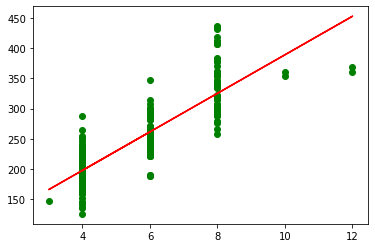

In [10]:
plt.scatter(train.CYLINDERS,train.CO2EMISSIONS,color='green')
plt.plot(train_x,regr.intercept_+regr.coef_*train_x,'-r')
plt.show()



In [11]:
# SAVING MODEL
joblib.dump(regr,'fccyvsco2.pkl')

['fccyvsco2.pkl']